<a href="https://colab.research.google.com/github/SayNoToMustache/sber_hw_bmla/blob/main/%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD%D0%BE%D0%B2_%222_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2_ML%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## О задании
В этом задании вы будете предсказывать число на изображении. Изображения размера 28х28 развёрнуты в вектор размера 784. На изображениях присутствует одна цифра от 0 до 9 (включительно).

Работать мы будем с датасетом MNIST

### Формат сдачи
Данное задание сдаётся через [эту гугл форму](https://forms.gle/wquiTtEKH4GY6EVQ9). Не забудьте открыть доступ по ссылке к файлу (справа сверху "Поделиться" или "Share")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Загрузим данные. 

*В Google Colab данный датасет присутствует по умолчанию в папке `sample_data`. Если выполняете задание не в Google Colab, то можете скачать данные [отсюда](https://drive.google.com/file/d/1CHSJtvbmjPIvaQy9DIKQLhu-BnO3mO6H/view?usp=share_link)

In [2]:
df = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

In [3]:
df.shape

(20000, 785)

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Каждая строка соответствует одному изображению. В первом столбце указана целевая переменная (число от 0 до 9), а в остальных - значения 784 пикселей изображения 28х28. Запишем признаки, по которым предсказываем в переменную `X`, а целевую переменную - в `y`

In [5]:
X = df.iloc[:, 1:].values
y = df[0].values

**Вопрос.** Какая задача машинного обучения решается?

<u>**Ответ**</u>: Классификации

Посмотрим на данные

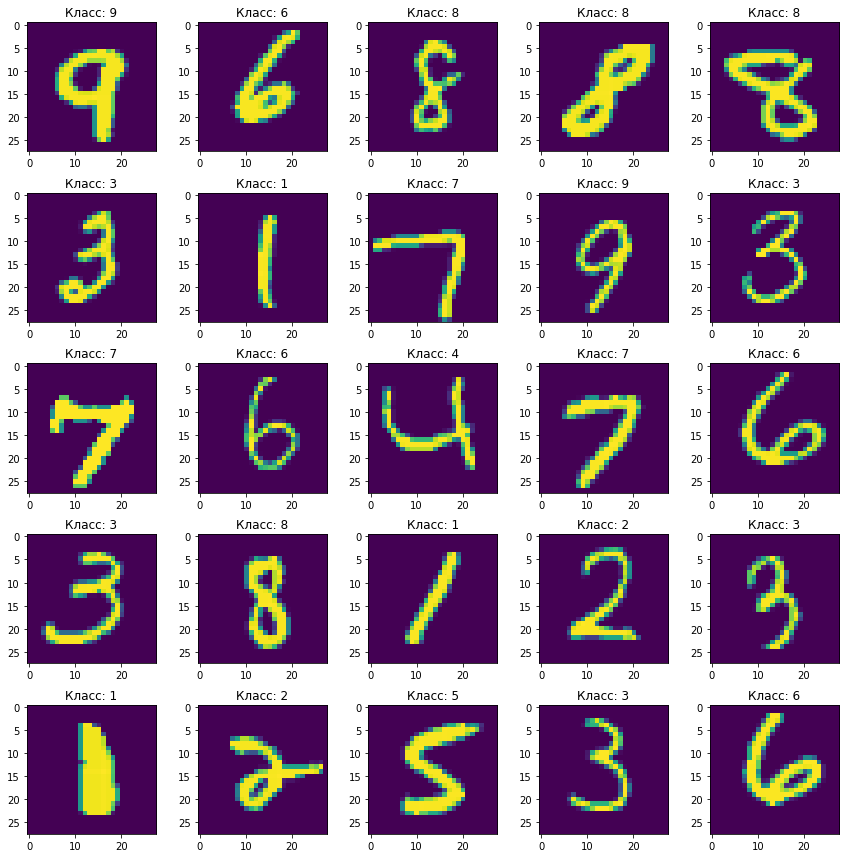

In [6]:
indices = np.random.randint(0, len(X), 25)
fig, axs = plt.subplots(5, 5, figsize=(12,12))
fig.tight_layout()
axs = axs.ravel()

for i, idx in enumerate(indices):
    img = X[idx].reshape(28, 28) # делаем reshape вектора, чтобы получить 28х28 изображение
    axs[i].imshow(img)
    axs[i].set_title(f'Класс: {y[idx]}')

## Разбиение данных

Разбейте данные на тренировочные и тестовые

*Не забудьте при разбиении сохранить соотношение классов в тренировочной и тестовой выброках

In [7]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 
from sklearn import model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, train_size= 0.25, stratify=y, random_state=42)

## Моделирование

Выберите 3 любых пройденных алгоритма машинного обучения и обучите их. Не забудьте подобрать лучшие гиперпараметры, если они есть. Качество моделей оценивайте по метрике `accuracy`

# Обучение без подбора

In [8]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 
# k - nearest neighbors
# Decision Tree
# naive_bayes
from sklearn.neighbors import KNeighborsClassifier

KNB = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
KNB.fit(x_train, y_train)


random_25_objects = np.random.randint(0, 15000, 25)
k = y_test[random_25_objects]

print("KNB predict =", KNB.predict(x_test[random_25_objects]))
print("y test =", y_test[random_25_objects])
for i in range(len(k)):
  if k[i] != KNB.predict(x_test[random_25_objects])[i]:
    print("Не равно в:", i, "Элементе массива")

accuracy_score(KNB.predict(x_test), y_test)

KNB predict = [5 6 8 1 3 2 3 5 8 2 7 0 9 0 7 2 7 3 6 3 2 7 9 7 0]
y test = [5 6 8 8 3 2 5 5 8 2 7 0 9 2 7 2 7 3 6 3 2 3 7 7 0]
Не равно в: 3 Элементе массива
Не равно в: 6 Элементе массива
Не равно в: 13 Элементе массива
Не равно в: 21 Элементе массива
Не равно в: 22 Элементе массива


0.9330666666666667

In [9]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

print("DTC predict =", DTC.predict(x_test[random_25_objects]))
print("y test =", y_test[random_25_objects])
for i in range(len(k)):
  if k[i] != DTC.predict(x_test[random_25_objects])[i]:
    print("Не равно в:", i, "Элементе массива")

accuracy_score(DTC.predict(x_test), y_test)

DTC predict = [5 2 8 8 5 2 3 3 6 2 7 0 9 3 7 2 7 4 6 2 2 8 3 7 4]
y test = [5 6 8 8 3 2 5 5 8 2 7 0 9 2 7 2 7 3 6 3 2 3 7 7 0]
Не равно в: 1 Элементе массива
Не равно в: 4 Элементе массива
Не равно в: 6 Элементе массива
Не равно в: 7 Элементе массива
Не равно в: 8 Элементе массива
Не равно в: 13 Элементе массива
Не равно в: 17 Элементе массива
Не равно в: 19 Элементе массива
Не равно в: 21 Элементе массива
Не равно в: 22 Элементе массива
Не равно в: 24 Элементе массива


0.7661333333333333

In [10]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

print("GNB predict =", GNB.predict(x_test[random_25_objects]))
print("y test =", y_test[random_25_objects])
for i in range(len(k)):
  if k[i] != GNB.predict(x_test[random_25_objects])[i]:
    print("Не равно в:", i, "Элементе массива")

accuracy_score(GNB.predict(x_test), y_test)

GNB predict = [0 6 8 8 6 6 0 5 4 4 7 0 9 0 9 4 9 1 6 9 6 9 9 9 0]
y test = [5 6 8 8 3 2 5 5 8 2 7 0 9 2 7 2 7 3 6 3 2 3 7 7 0]
Не равно в: 0 Элементе массива
Не равно в: 4 Элементе массива
Не равно в: 5 Элементе массива
Не равно в: 6 Элементе массива
Не равно в: 8 Элементе массива
Не равно в: 9 Элементе массива
Не равно в: 13 Элементе массива
Не равно в: 14 Элементе массива
Не равно в: 15 Элементе массива
Не равно в: 16 Элементе массива
Не равно в: 17 Элементе массива
Не равно в: 19 Элементе массива
Не равно в: 20 Элементе массива
Не равно в: 21 Элементе массива
Не равно в: 22 Элементе массива
Не равно в: 23 Элементе массива


0.5828666666666666

**Подбор гипер параметров**


# С подбором гиперпараметров

**K** neighbors

In [11]:
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,5))
p=[1,2]

hyperparameters = dict(n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(x_train,y_train)
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best p: 2
Best n_neighbors: 1


In [12]:
bm_k = best_model.predict(x_test)

print("best KNC predict =", bm_k[random_25_objects])
print("y test =", y_test[random_25_objects])


best KNC predict = [5 6 8 1 3 2 5 5 8 1 7 0 9 0 7 2 7 3 6 3 2 7 9 7 0]
y test = [5 6 8 8 3 2 5 5 8 2 7 0 9 2 7 2 7 3 6 3 2 3 7 7 0]


In [13]:
accuracy_score(bm_k, y_test)

0.939

**Tree**

In [14]:
from sklearn.model_selection import GridSearchCV

DTC_2 = DecisionTreeClassifier()
max_depth = [i for i in range(17, 64)]
splitter = ["best", "random"]
min_samples_leaf = [i for i in range(2, 15)]

hyperparameters = dict(max_depth=max_depth, splitter=splitter, min_samples_leaf=min_samples_leaf)
clf = GridSearchCV(DTC_2, hyperparameters, cv=3)
best_model_dt = clf.fit(x_train,y_train)

In [15]:
print('Best max_depth:', best_model_dt.best_estimator_.get_params()['max_depth'])
print('Best splitter:', best_model_dt.best_estimator_.get_params()['splitter'])
print('Best min_samples_leaf:', best_model_dt.best_estimator_.get_params()['min_samples_leaf'])

Best max_depth: 58
Best splitter: best
Best min_samples_leaf: 3


In [16]:
accuracy_score(best_model_dt.predict(x_test), y_test)

0.7686666666666667

**naive_bayes**

In [17]:
GNB_2 = GaussianNB()

# var_smoothing =[1e-9, 1e-10, 1e-11, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-1] # 1e-1 - лучший
# var_smoothing =[i / 10 for i in range(1, 10)] # 0.1 - лучший
var_smoothing =[i / 100 for i in range(1, 100)] # 0.06 - лучший
hyperparameters = dict(var_smoothing=var_smoothing)
clf = GridSearchCV(GNB_2, hyperparameters, cv=3)
best_model_nb = clf.fit(x_train,y_train)

In [18]:
print('Best var_smoothing:', best_model_nb.best_estimator_.get_params()['var_smoothing'])

Best var_smoothing: 0.06


In [19]:
accuracy_score(best_model_nb.predict(x_test), y_test)

0.8029333333333334

*Подбор гиперпараметров дал более удачную оценку*

**(*) Дополнительно.** Провизуализируйте предсказания модели, используя код выше: случайным образом выберите 25 объектов из тестового множества и отобразите их реальные метки класса, а также предсказания модели

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

# Визуализация

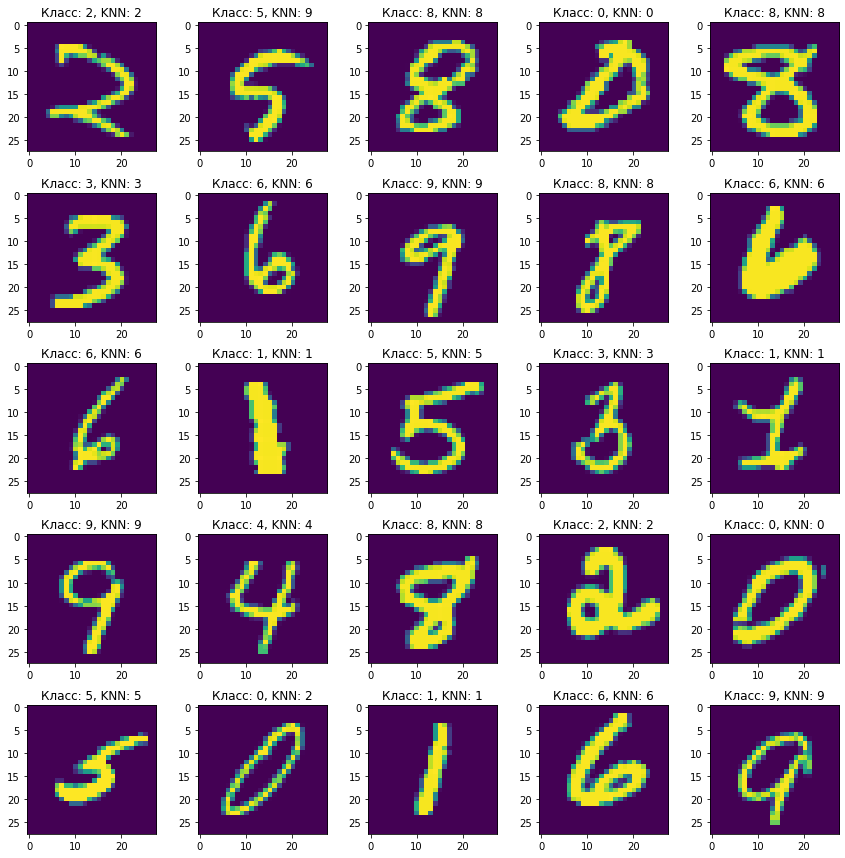

In [20]:
indices = np.random.randint(0, len(x_test), 25)
fig, axs = plt.subplots(5, 5, figsize=(12,12))
fig.tight_layout()
axs = axs.ravel()

bmp = best_model.predict(x_test)

for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28) # делаем reshape вектора, чтобы получить 28х28 изображение
    axs[i].imshow(img)
    axs[i].set_title(f'Класс: {y_test[idx]}, KNN: {bmp[idx]}')

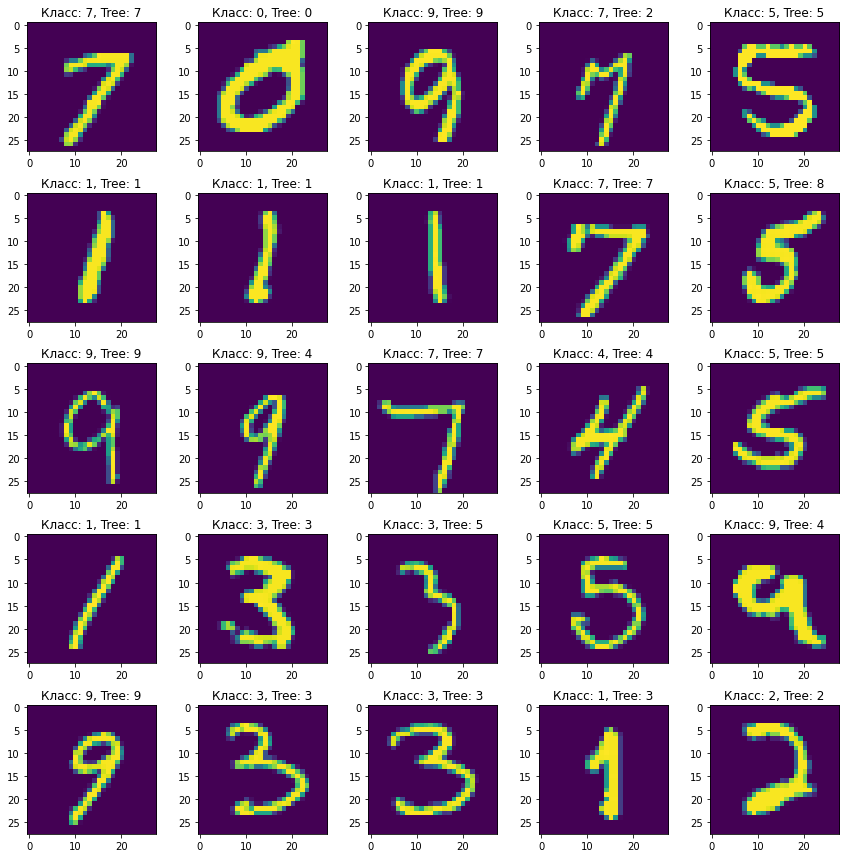

In [21]:
indices = np.random.randint(0, len(x_test), 25)
fig, axs = plt.subplots(5, 5, figsize=(12,12))
fig.tight_layout()
axs = axs.ravel()

bmpdt = best_model_dt.predict(x_test)

for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28) # делаем reshape вектора, чтобы получить 28х28 изображение
    axs[i].imshow(img)
    axs[i].set_title(f'Класс: {y_test[idx]}, Tree: {bmpdt[idx]}')

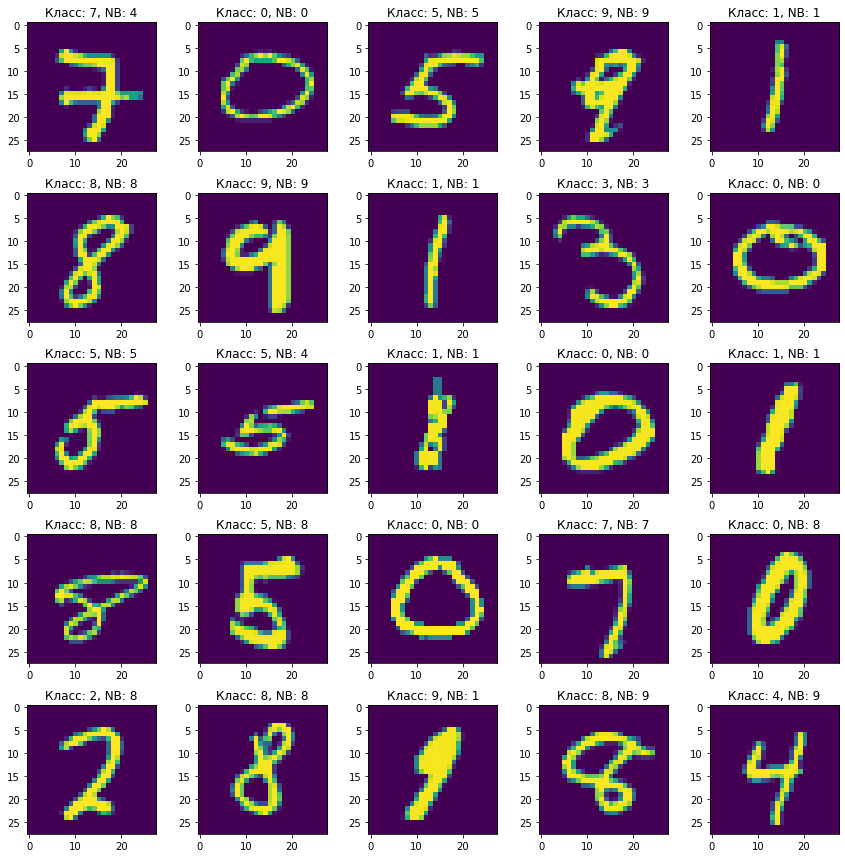

In [22]:
indices = np.random.randint(0, len(x_test), 25)
fig, axs = plt.subplots(5, 5, figsize=(12,12))
fig.tight_layout()
axs = axs.ravel()

bmpnb = best_model_nb.predict(x_test)

for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28) # делаем reshape вектора, чтобы получить 28х28 изображение
    axs[i].imshow(img)
    axs[i].set_title(f'Класс: {y_test[idx]}, NB: {bmpnb[idx]}')

## Выводы

**Вопрос.** Напишите выводы о проделанной работе: какие модели выбраны; какие гиперпараметры перебирались и какие значения гиперпараметров оказались лучшими; какая модель оказалась лучшей?

<u>**Ответ**</u>: Были выбраны модели k-близжайших соседей, наивный байес и решающее дерево. 

Для k-близжайших соседей гиперпараметрами для перебора стали: метрика и кол-во соседей. Лучшая модель

Решающее дерево показало худший результат, параметрами были максимальная гулубина, выбор лучшего разбиения и минимальное кол-во экземляров

Наивный байес показал средний результат, для него выбирался один параметр минимальная вариация между классами